C:\Users\gkswl\AppData\Local\Temp\ipykernel_7156\4009409073.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=region_counts, y='url_region', x='count', palette='viridis')


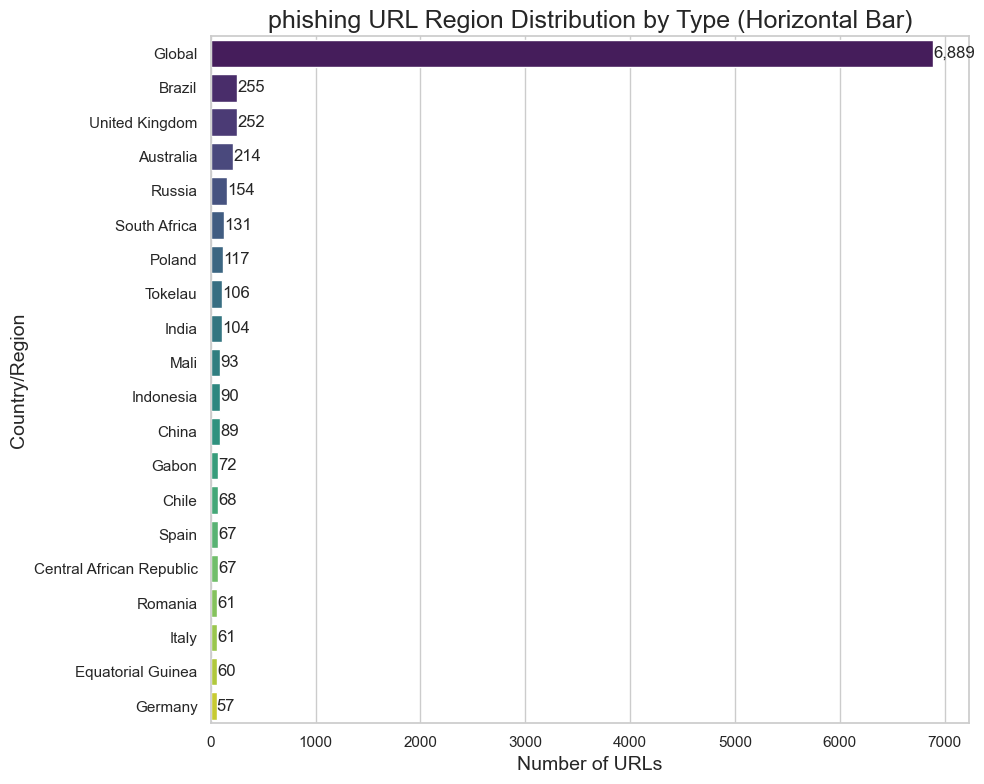

C:\Users\gkswl\AppData\Local\Temp\ipykernel_7156\4009409073.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=region_counts, y='url_region', x='count', palette='viridis')


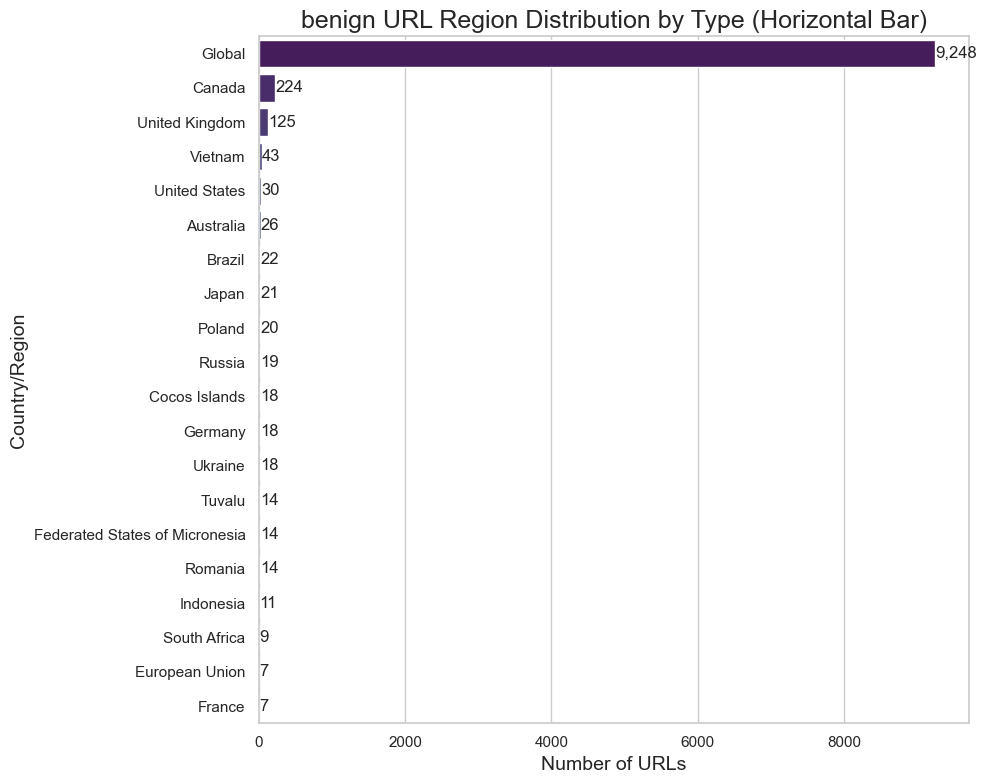

C:\Users\gkswl\AppData\Local\Temp\ipykernel_7156\4009409073.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=region_counts, y='url_region', x='count', palette='viridis')


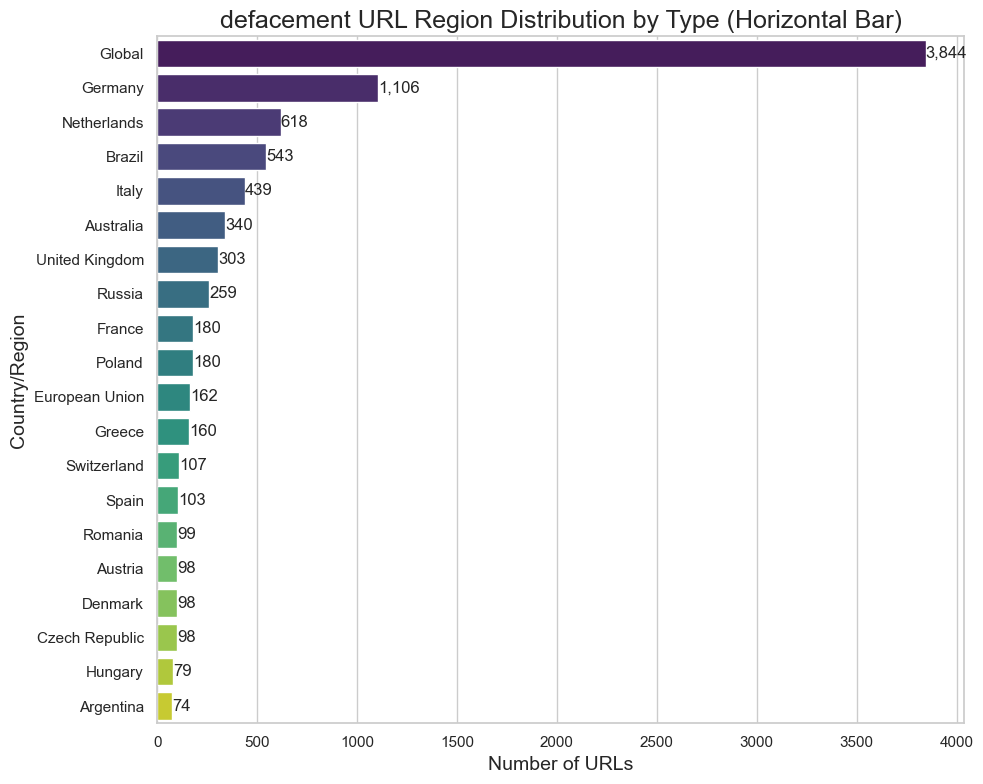

C:\Users\gkswl\AppData\Local\Temp\ipykernel_7156\4009409073.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=region_counts, y='url_region', x='count', palette='viridis')


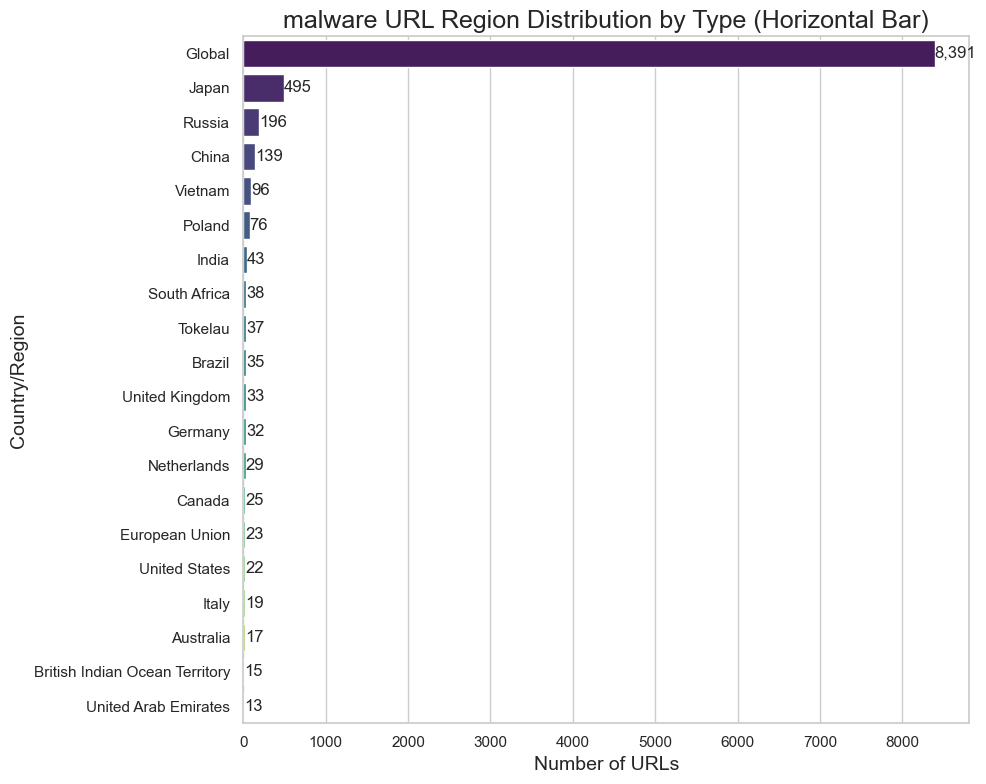

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. CSV 파일 불러오기
df = pd.read_csv('../data/balanced_random_40K_test3.csv')

# 2. 필요한 열만 추출 후 결측값 제거
df = df[['type', 'url_region']].dropna()

# 3. 시각화 스타일 설정
sns.set(style="whitegrid")

# 4. type별 반복
unique_types = df['type'].unique()

for t in unique_types:
    # 해당 type 데이터 필터링
    sub_df = df[df['type'] == t]

    # 국가별 count 집계
    region_counts = sub_df['url_region'].value_counts().reset_index()
    region_counts.columns = ['url_region', 'count']
    region_counts = region_counts[region_counts['count'] > 0]

    # 👉 상위 20개 국가만 추출
    region_counts = region_counts.head(20)

    # 시각화 (가로 막대)
    plt.figure(figsize=(10, max(6, len(region_counts) * 0.4)))
    ax = sns.barplot(data=region_counts, y='url_region', x='count', palette='viridis')

    # 👉 각 막대 옆에 수치 표시
    for p in ax.patches:
        count = int(p.get_width())
        ax.text(p.get_width() + 1,
                p.get_y() + p.get_height()/2,
                f'{count:,}',  # 천 단위 쉼표
                va='center')

    # 그래프 제목 및 라벨
    plt.title(f"{t} URL Region Distribution by Type (Horizontal Bar)", fontsize=18)
    plt.xlabel('Number of URLs', fontsize=14)
    plt.ylabel('Country/Region', fontsize=14)
    plt.tight_layout()
    plt.show()
